# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the train dataset

In [2]:
cc_data1 = pd.read_csv('../raw_data/fraudTrain.csv', index_col=0)
cc_data2 = pd.read_csv('../raw_data/fraudTest.csv', index_col=0)

In [3]:
cc_data = pd.concat([cc_data1, cc_data2],ignore_index=True)

In [4]:
cc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 22 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   trans_date_trans_time  object 
 1   cc_num                 int64  
 2   merchant               object 
 3   category               object 
 4   amt                    float64
 5   first                  object 
 6   last                   object 
 7   gender                 object 
 8   street                 object 
 9   city                   object 
 10  state                  object 
 11  zip                    int64  
 12  lat                    float64
 13  long                   float64
 14  city_pop               int64  
 15  job                    object 
 16  dob                    object 
 17  trans_num              object 
 18  unix_time              int64  
 19  merch_lat              float64
 20  merch_long             float64
 21  is_fraud               int64  
dtypes: float64(5), int

In [5]:
cc_data.head(5)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [6]:
cc_data.shape

(1852394, 22)

# Establish new dfs for fraudulent transactions and valid transactions

In [7]:
cc_data_fraud = cc_data[cc_data['is_fraud']==1]
cc_data_valid = cc_data[cc_data['is_fraud']==0]

In [8]:
cc_data_fraud.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9651 entries, 2449 to 1814246
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   trans_date_trans_time  9651 non-null   object 
 1   cc_num                 9651 non-null   int64  
 2   merchant               9651 non-null   object 
 3   category               9651 non-null   object 
 4   amt                    9651 non-null   float64
 5   first                  9651 non-null   object 
 6   last                   9651 non-null   object 
 7   gender                 9651 non-null   object 
 8   street                 9651 non-null   object 
 9   city                   9651 non-null   object 
 10  state                  9651 non-null   object 
 11  zip                    9651 non-null   int64  
 12  lat                    9651 non-null   float64
 13  long                   9651 non-null   float64
 14  city_pop               9651 non-null   int64  
 15

In [9]:
cc_data_valid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1842743 entries, 0 to 1852393
Data columns (total 22 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   trans_date_trans_time  object 
 1   cc_num                 int64  
 2   merchant               object 
 3   category               object 
 4   amt                    float64
 5   first                  object 
 6   last                   object 
 7   gender                 object 
 8   street                 object 
 9   city                   object 
 10  state                  object 
 11  zip                    int64  
 12  lat                    float64
 13  long                   float64
 14  city_pop               int64  
 15  job                    object 
 16  dob                    object 
 17  trans_num              object 
 18  unix_time              int64  
 19  merch_lat              float64
 20  merch_long             float64
 21  is_fraud               int64  
dtypes: float64(5), int

In [10]:
cc_data.isnull().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

### Initial observations:
- No missing values
- 1,296,675 transactions in total
    - 1,289,169 valid transactions
    - 7,506 fraudulent transactions

Text(0.5, 1.0, 'Distribution of fraudulent and valid transactions')

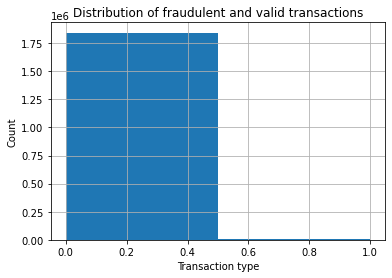

In [11]:
cc_data.is_fraud.hist(bins = 2)
plt.xlabel('Transaction type')
plt.ylabel('Count')
plt.title('Distribution of fraudulent and valid transactions')

In [12]:
valid_pct = (len(cc_data_valid)/len(cc_data))*100
fraud_pct = (len(cc_data_fraud)/len(cc_data))*100
print('The percentage of valid transactions is {}% and the percentage of fraud transactions is {}%'.format(valid_pct, fraud_pct))

The percentage of valid transactions is 99.47899852839083% and the percentage of fraud transactions is 0.5210014716091717%


# Examining how many unique transaction categories there are

In [13]:
cc_data['category'].unique()

array(['misc_net', 'grocery_pos', 'entertainment', 'gas_transport',
       'misc_pos', 'grocery_net', 'shopping_net', 'shopping_pos',
       'food_dining', 'personal_care', 'health_fitness', 'travel',
       'kids_pets', 'home'], dtype=object)

In [14]:
cc_data['category'].nunique()

14

In [15]:
cc_data['category'].value_counts()

gas_transport     188029
grocery_pos       176191
home              175460
shopping_pos      166463
kids_pets         161727
shopping_net      139322
entertainment     134118
food_dining       130729
personal_care     130085
health_fitness    122553
misc_pos          114229
misc_net           90654
grocery_net        64878
travel             57956
Name: category, dtype: int64

# Examining job column

In [16]:
cc_data['job'].value_counts()

Film/video editor             13898
Exhibition designer           13167
Surveyor, land/geomatics      12436
Naval architect               12434
Materials engineer            11711
                              ...  
Veterinary surgeon                8
Engineer, water                   8
Contracting civil engineer        7
Ship broker                       7
Warehouse manager                 7
Name: job, Length: 497, dtype: int64

In [17]:
cc_data['job'].unique()

array(['Psychologist, counselling', 'Special educational needs teacher',
       'Nature conservation officer', 'Patent attorney',
       'Dance movement psychotherapist', 'Transport planner',
       'Arboriculturist', 'Designer, multimedia',
       'Public affairs consultant', 'Pathologist', 'IT trainer',
       'Systems developer', 'Engineer, land', 'Systems analyst',
       'Naval architect', 'Radiographer, diagnostic',
       'Programme researcher, broadcasting/film/video', 'Energy engineer',
       'Event organiser', 'Operational researcher', 'Market researcher',
       'Probation officer', 'Leisure centre manager',
       'Corporate investment banker', 'Therapist, occupational',
       'Call centre manager', 'Police officer',
       'Education officer, museum', 'Physiotherapist', 'Network engineer',
       'Forensic psychologist', 'Geochemist',
       'Armed forces training and education officer',
       'Designer, furniture', 'Optician, dispensing',
       'Psychologist, forensic

In [18]:
# Top jobs for valid transactions:
cc_data_valid['job'].value_counts()

Film/video editor               13846
Exhibition designer             13116
Surveyor, land/geomatics        12386
Naval architect                 12368
Designer, ceramics/pottery      11665
                                ...  
Writer                            726
Marketing executive               726
Clinical cytogeneticist           726
Engineer, civil (consulting)      725
Engineer, materials               724
Name: job, Length: 475, dtype: int64

In [19]:
# Top jobs for fraudulent transactions:
cc_data_fraud['job'].value_counts()

Quantity surveyor                        69
Naval architect                          66
Materials engineer                       62
Audiological scientist                   58
Senior tax professional/tax inspector    57
                                         ..
Pension scheme manager                    4
Designer, exhibition/display              4
Statistician                              3
Health physicist                          3
Contractor                                2
Name: job, Length: 494, dtype: int64

Something to consider: Is it worth creating categories for jobs?

# Examine amt column

Text(0.5, 1.0, 'Distribution of transaction amounts')

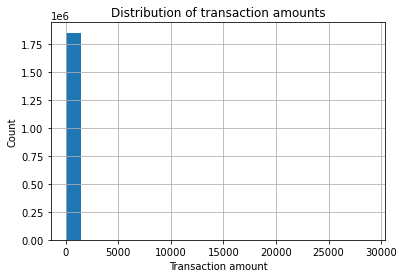

In [20]:
cc_data['amt'].hist(bins = 20)
plt.xlabel('Transaction amount')
plt.ylabel('Count')
plt.title('Distribution of transaction amounts')

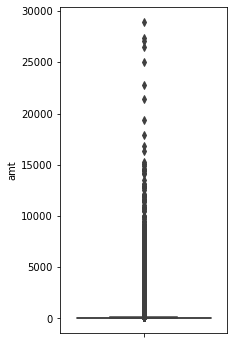

In [21]:
#boxplot of the transaction amount column
plt.figure(figsize=(3, 6))
sns.boxplot(y = cc_data['amt'])
plt.show()

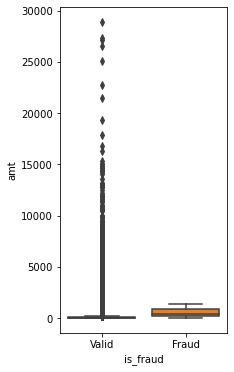

In [22]:
#construct separate boxplots for valid transactions and fraud transactions
plt.figure(figsize=(3, 6))
sns.boxplot(x=cc_data['is_fraud'], y = cc_data['amt'])
plt.xticks([0, 1], ['Valid', 'Fraud'])
plt.show()

In [23]:
cc_data['amt'].max()

28948.9

Is the transaction with amount 28,948.90 a mistake, or an outlier that can be removed?

In [24]:
#Find the row with transaction 28,948.90
cc_data.loc[cc_data['amt']==28948.9]

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
787549,2019-12-01 16:19:23,4979422371139333,fraud_Satterfield-Lowe,travel,28948.9,Kelly,Zimmerman,F,1893 Katie Tunnel,Westerville,...,41.4193,-99.3844,73,Product designer,1935-02-10,309c4bf7fc47b1ddee5ad883bcf634b6,1354378763,42.317313,-99.139498,0


Text(0.5, 1.0, 'Distribution of VALID transaction amounts')

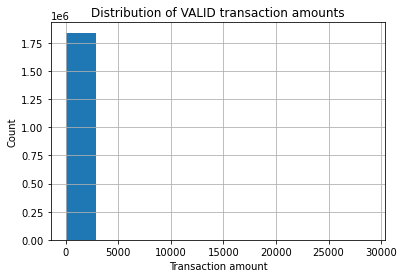

In [25]:
cc_data_valid['amt'].hist(bins = 10)
plt.xlabel('Transaction amount')
plt.ylabel('Count')
plt.title('Distribution of VALID transaction amounts')

Text(0.5, 1.0, 'Distribution of FRAUD transaction amounts')

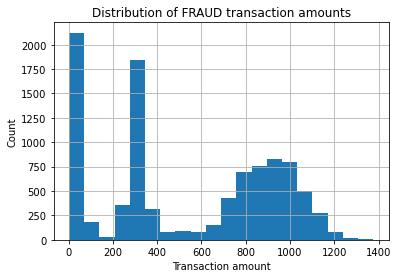

In [26]:
cc_data_fraud['amt'].hist(bins = 20)
plt.xlabel('Transaction amount')
plt.ylabel('Count')
plt.title('Distribution of FRAUD transaction amounts')

### Check for number of outliers within valid transactions at different thresholds

In [27]:
#Establish total number of valid transactions
total_valid = len(cc_data_valid)
total_valid

1842743

In [28]:
#Number of valid transactions >= $25,000
num_grtr_25000 = len(cc_data_valid[cc_data_valid['amt']>=25000])
print('There are {} valid transactions out of {} that are greater than or equal to $25000'.format(num_grtr_25000, total_valid))

There are 5 valid transactions out of 1842743 that are greater than or equal to $25000


In [29]:
#Number of valid transactions >= $20,000
num_grtr_20000 = len(cc_data_valid[cc_data_valid['amt']>=20000])
print('There are {} valid transactions out of {} that are greater than or equal to $20000'.format(num_grtr_20000, total_valid))

There are 7 valid transactions out of 1842743 that are greater than or equal to $20000


In [30]:
#Number of valid transactions >= $15,000
num_grtr_15000 = len(cc_data_valid[cc_data_valid['amt']>=15000])
print('There are {} valid transactions out of {} that are greater than or equal to $15000'.format(num_grtr_15000, total_valid))

There are 14 valid transactions out of 1842743 that are greater than or equal to $15000


In [31]:
#Number of valid transactions >= $10,000
num_grtr_10000 = len(cc_data_valid[cc_data_valid['amt']>=10000])
print('There are {} valid transactions out of {} that are greater than or equal to $10000'.format(num_grtr_10000, total_valid))

There are 46 valid transactions out of 1842743 that are greater than or equal to $10000


In [32]:
#Number of valid transactions >= $5,000
num_grtr_5000 = len(cc_data_valid[cc_data_valid['amt']>=5000])
print('There are {} valid transactions out of {} that are greater than or equal to $5000'.format(num_grtr_5000, total_valid))

There are 195 valid transactions out of 1842743 that are greater than or equal to $5000


In [33]:
#Look at transactions that are >= $10,000
cc_data_valid[cc_data_valid['amt']>=10000]

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
17743,2019-01-11 16:37:15,343472729187663,"fraud_Schroeder, Wolff and Hermiston",travel,11872.21,Gloria,Wallace,F,234 Bridges Wells Apt. 389,Center Tuftonboro,...,43.6849,-71.2551,1368,"Optician, dispensing",1971-08-05,4f3ddd38d97af5a9808705a6bd742960,1326299835,43.235621,-71.391741,0
37315,2019-01-22 15:24:15,2264937662466770,"fraud_Ritchie, Bradtke and Stiedemann",travel,10776.59,Juan,Sherman,M,5939 Garcia Forges Suite 297,San Antonio,...,29.3641,-98.4924,1595797,Land,1995-10-17,16928015dca994adc051afe4b42b1c54,1327245855,29.772325,-98.593405,0
59564,2019-02-04 21:22:30,30235268718158,"fraud_Champlin, Rolfson and Connelly",travel,12788.07,Kenneth,Doyle,M,8614 Reed Glen,West Harrison,...,41.0592,-73.7395,11250,Lexicographer,1977-08-16,b544af3bb2b803347b8b71995d965acd,1328390550,40.269472,-73.482064,0
105732,2019-03-02 15:36:36,4633065159406313,"fraud_Champlin, Rolfson and Connelly",travel,11629.34,Jasmine,Wade,F,90662 Lewis Avenue,Providence,...,41.8383,-71.4377,203571,"Nurse, children's",1995-11-29,8a31df33975e8773d4c8cc34799c5624,1330702596,42.504489,-71.379189,0
150564,2019-03-22 13:17:34,4450831335606294,"fraud_Larson, Quitzon and Spencer",travel,15034.18,Donna,Davis,F,6760 Donovan Lakes,Clayton,...,34.5906,-95.3800,1760,Occupational psychologist,1972-01-20,938cfcbde2c3a64c38b7855eb8288de0,1332422254,35.266488,-95.033506,0
159575,2019-03-25 17:38:55,372509258176510,fraud_Tillman LLC,travel,10469.09,Kristen,Hanson,F,26544 Andrea Glen,Goodrich,...,42.9147,-83.4845,6951,Learning disability nurse,1985-06-18,37d46917137e98e2299a80603c270008,1332697135,42.192907,-84.094660,0
164881,2019-03-28 16:53:47,630451534402,fraud_Ankunding-Carroll,travel,14630.68,Rachel,Daniels,F,561 Little Plain Apt. 738,Wetmore,...,46.3535,-86.6345,765,Immunologist,1972-06-12,c3fd5aeb603b150ce5c05c7ee38ada97,1332953627,46.944452,-85.746696,0
187885,2019-04-07 15:32:23,6538441737335434,fraud_Tillman LLC,travel,17897.24,Gina,Grimes,F,444 Robert Mews,Clarks Mills,...,41.3851,-80.1752,606,Energy manager,1997-09-22,1c9f2b574fb9bf860c76ea200252fe05,1333812743,41.361042,-79.665772,0
232174,2019-04-27 13:27:50,4003989662068504,"fraud_Reichel, Bradtke and Blanda",travel,10525.07,Chris,White,M,98897 Bennett Lodge,Bessemer,...,33.3224,-86.9657,71463,Radio broadcast assistant,1989-02-08,e4aa11789bc7a79d59121bd4dbe1e585,1335533270,32.565170,-86.935466,0
315542,2019-06-01 13:59:46,4502539526809429801,fraud_Lynch-Mohr,travel,13536.84,Stephanie,Cummings,F,1025 Robin Square,Ash Flat,...,36.2201,-91.6421,2856,Hydrologist,1926-08-27,484dea41c15688aef498634ee745dfa8,1338559186,36.236003,-91.615941,0


Seems like all extreme valid transactions are in the travel category. For FRAUDULENT transactions, the 'travel' category has the least number of cases, so we can probably remove some of these outliers from the valid transactions dataframe.

In [34]:
#Take a quick look at all FRAUDULENT TRAVEL RELATED transactions
#Look at transactions that are >= $15,000
cc_data_fraud[cc_data_fraud['category']=='travel']

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
4693,2019-01-03 22:58:44,4922710831011201,fraud_Mosciski Group,travel,4.50,Heather,Chase,F,6888 Hicks Stream Suite 954,Manor,...,40.3359,-79.6607,1472,Public affairs consultant,1941-03-07,2751eef2242b86fba1c3e6c1bb6a7022,1325631524,39.492341,-78.859114,1
15472,2019-01-09 22:23:50,342035762534413,fraud_Treutel-King,travel,10.53,Jennifer,Carrillo,F,334 Adam Mountains Apt. 868,Manquin,...,37.7184,-77.1860,976,"Engineer, automotive",1999-06-19,52f0ff84e35961080272e6c4b531bf89,1326147830,37.988194,-77.332289,1
15508,2019-01-09 22:58:24,4806443445305,fraud_Boyer-Haley,travel,9.91,Eric,Patel,M,69459 Rachel Prairie Apt. 850,Ironton,...,38.5294,-82.6654,21635,Geochemist,2001-07-10,f766eae4ee862d058458d0a262dc5350,1326149904,39.080891,-83.365176,1
24097,2019-01-14 23:36:30,180031190491743,fraud_Fritsch LLC,travel,10.20,Becky,Mckinney,F,250 Benjamin Hill Apt. 026,Mobile,...,30.7145,-88.0918,270712,"Surveyor, land/geomatics",1972-01-05,ea62a6e5991cf818d330622a0d4cf598,1326584190,31.648465,-88.117149,1
26270,2019-01-15 22:05:57,3595192916105588,fraud_Kovacek Ltd,travel,10.29,Dustin,Roberts,M,3283 James Station,Fayetteville,...,35.0583,-79.0080,238602,"Scientist, research (maths)",1993-05-14,94971557dbb3bc25471ff8e5d1358962,1326665157,35.102385,-79.953349,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1684280,2020-11-19 23:16:34,4066595222529,"fraud_Ritchie, Oberbrunner and Cremin",travel,9.03,Jamie,Olson,F,3423 Michael Canyon Suite 276,River,...,37.8795,-82.7251,571,Quarry manager,1931-03-07,653440bdbbeaa16532c974035c82a4ef,1384902994,38.580916,-81.725325,1
1687966,2020-11-21 23:37:19,3582402971899057,fraud_Johnston-Casper,travel,10.00,Michele,Patrick,F,557 Lynn Garden Suite 907,Spirit Lake,...,47.9657,-116.8680,4161,Production manager,1957-06-12,68ca217e66cb8aa81fe6707f8ec2cdfb,1385077039,47.538401,-116.523594,1
1756169,2020-12-10 17:30:59,4560395181594436016,"fraud_Schroeder, Wolff and Hermiston",travel,8.96,Angela,Taylor,F,6343 Ramirez Skyway Apt. 518,Lakeport,...,39.0470,-122.9328,11256,Podiatrist,1972-10-18,5dd2b06961eb8ec531ad21bb09e8658f,1386696659,39.050171,-122.692423,1
1758869,2020-12-11 12:36:24,4560395181594436016,fraud_Kris-Kertzmann,travel,7.88,Angela,Taylor,F,6343 Ramirez Skyway Apt. 518,Lakeport,...,39.0470,-122.9328,11256,Podiatrist,1972-10-18,6b7742d1412057c8ff9f3b701fb6a8b5,1386765384,39.139593,-122.688798,1


Text(0.5, 1.0, 'Distribution of Fraudulent Travel Transaction Amounts')

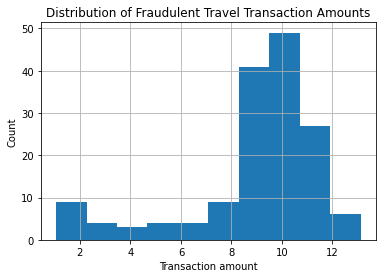

In [35]:
#Get a distribution of fraudulent transaction amounts that are travel related.
cc_data_fraud[cc_data_fraud['category']=='travel']['amt'].hist(bins = 10)
plt.xlabel('Transaction amount')
plt.ylabel('Count')
plt.title('Distribution of Fraudulent Travel Transaction Amounts')

Since all the fraudulent transactions that are TRAVEL related are under $13, we can probably remove a fair number of our travel related outliers from the valid transactions data frame.

In [36]:
#How many VALID, TRAVEL transactions are there under $5000?
num_less_5000 = len(cc_data_valid[(cc_data_valid['amt']<5000) & (cc_data_valid['category']=='travel')])
print('There are {} valid travel transactions that are less than $5000'.format(num_less_5000))

There are 57649 valid travel transactions that are less than $5000


Text(0.5, 1.0, 'Distribution of Valid Travel Transaction Amounts')

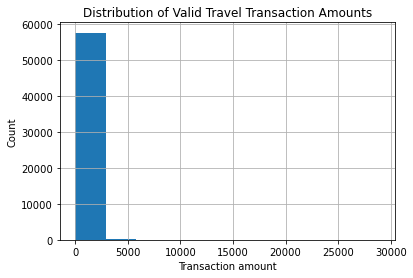

In [37]:
#Get a histogram of VALID, TRAVEL, transactions
cc_data_valid[cc_data_valid['category']=='travel']['amt'].hist(bins = 10)
plt.xlabel('Transaction amount')
plt.ylabel('Count')
plt.title('Distribution of Valid Travel Transaction Amounts')

Text(0.5, 1.0, 'Distribution of Valid Travel Transaction Amounts Greater than $5000')

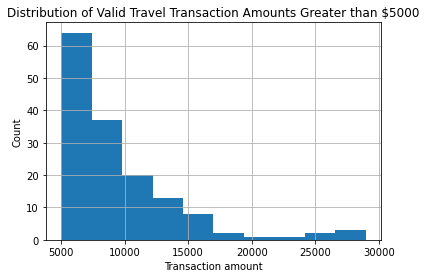

In [38]:
#Get a histogram of VALID, TRAVEL, transactions that are greater than or equal to $5000
cc_data_valid[(cc_data_valid['category']=='travel') & (cc_data_valid['amt'] >= 5000)]['amt'].hist(bins = 10)
plt.xlabel('Transaction amount')
plt.ylabel('Count')
plt.title('Distribution of Valid Travel Transaction Amounts Greater than $5000')

Text(0.5, 1.0, 'Distribution of Valid Travel Transaction Amounts Less than $5000')

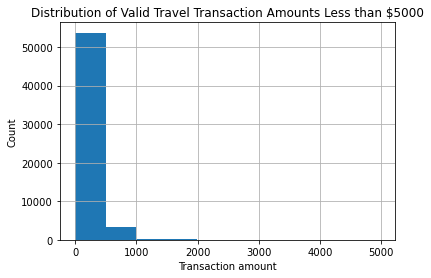

In [39]:
#Get a histogram of VALID, TRAVEL, transactions that are less than $5000
cc_data_valid[(cc_data_valid['category']=='travel') & (cc_data_valid['amt'] < 5000)]['amt'].hist(bins = 10)
plt.xlabel('Transaction amount')
plt.ylabel('Count')
plt.title('Distribution of Valid Travel Transaction Amounts Less than $5000')

Check if all valid travel transactions >= $5000 are travel related

In [40]:
cc_data_valid[cc_data_valid['amt']>=5000]['category'].value_counts()

travel          151
shopping_pos     25
shopping_net     19
Name: category, dtype: int64

We'll use $5000 as the threshold for removing outliers, provided that they are travel related expenses. Will keep shopping_net and shopping_pos outliers since there are a fair number of fraudulent transactions under these categories.

In [41]:
cc_data = cc_data.drop(cc_data[(cc_data.amt >= 5000) & (cc_data.category == 'travel')].index)

Text(0.5, 1.0, 'Distribution of transaction amounts')

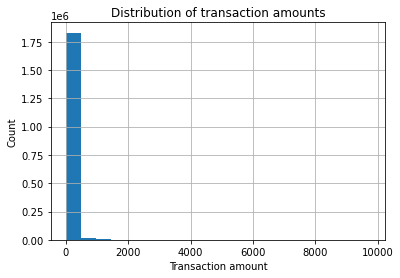

In [42]:
#check histogram of transaction amounts for whole dataset
cc_data['amt'].hist(bins = 20)
plt.xlabel('Transaction amount')
plt.ylabel('Count')
plt.title('Distribution of transaction amounts')

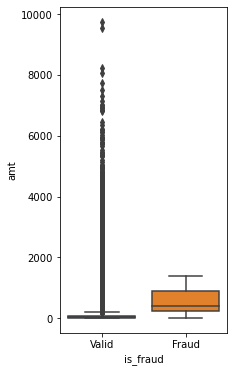

In [43]:
# new boxplot of 'amt' column
plt.figure(figsize=(3, 6))
sns.boxplot(x=cc_data['is_fraud'], y = cc_data['amt'])
plt.xticks([0, 1], ['Valid', 'Fraud'])
plt.show()

In [44]:
#check for travel transactions >=$5000
cc_data[(cc_data['category']=='travel') & (cc_data['amt']>=5000)]

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud


In [45]:
#Reassign fraudulent dataframe and valid dataframe
cc_data_fraud = cc_data[cc_data['is_fraud']==1]
cc_data_valid = cc_data[cc_data['is_fraud']==0]

# Examine gender column

In [46]:
cc_data['gender'].value_counts()

F    1014673
M     837570
Name: gender, dtype: int64

Text(0.5, 1.0, 'Transaction count by gender (all transactions)')

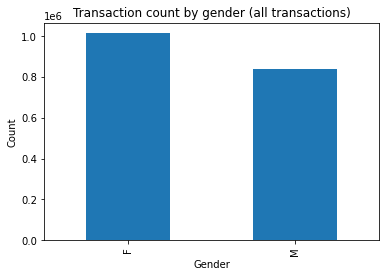

In [47]:
cc_data['gender'].value_counts().plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Transaction count by gender (all transactions)')

Text(0.5, 1.0, 'Transaction count by gender (VALID transactions only)')

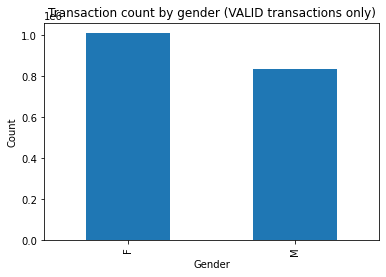

In [48]:
cc_data_valid['gender'].value_counts().plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Transaction count by gender (VALID transactions only)')

Text(0.5, 1.0, 'Transaction count by gender (FRAUD transactions only)')

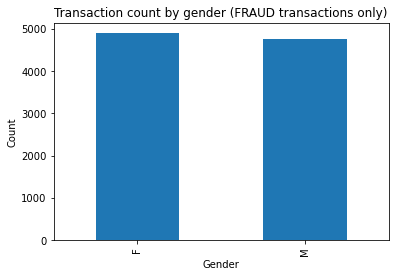

In [49]:
cc_data_fraud['gender'].value_counts().plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Transaction count by gender (FRAUD transactions only)')

# Examine state column

In [50]:
cc_data['state'].value_counts()

TX    135254
NY    119409
PA    114166
CA     80485
OH     66621
MI     65820
IL     62209
FL     60768
AL     58518
MO     54900
MN     45428
AR     44608
NC     43131
VA     41752
WI     41735
SC     41729
KY     40979
IN     39535
IA     38801
OK     38045
MD     37341
GA     37338
WV     36527
NJ     35129
NE     34419
KS     32938
MS     30017
LA     29950
WY     27774
WA     27039
OR     26407
TN     24913
ME     23432
NM     23425
ND     21183
CO     19764
SD     17574
MA     17560
VT     16812
MT     16803
AZ     15362
UT     15357
NH     11722
CT     10977
NV      8058
ID      8035
DC      5129
HI      3649
AK      2963
RI       744
DE         9
Name: state, dtype: int64

In [51]:
# Checking state count for VALID transactions
cc_data_valid['state'].value_counts()

TX    134662
NY    118679
PA    113594
CA     80083
OH     66261
MI     65521
IL     61885
FL     60434
AL     58240
MO     54638
MN     45148
AR     44413
NC     42936
WI     41507
SC     41493
VA     41479
KY     40757
IN     39318
IA     38590
OK     37845
MD     37138
GA     37134
WV     36381
NJ     34968
NE     34203
KS     32745
MS     29848
LA     29837
WY     27655
WA     26913
OR     26210
TN     24754
NM     23304
ME     23298
ND     21099
CO     19649
SD     17482
MA     17473
VT     16740
MT     16734
AZ     15298
UT     15296
NH     11643
CT     10921
NV      8011
ID      8002
DC      5098
HI      3633
AK      2913
RI       729
Name: state, dtype: int64

In [52]:
# Checking state count for FRAUD transactions
cc_data_fraud['state'].value_counts()

NY    730
TX    592
PA    572
CA    402
OH    360
FL    334
IL    324
MI    299
MN    280
AL    278
VA    273
MO    262
SC    236
WI    228
KY    222
IN    217
NE    216
IA    211
GA    204
MD    203
OK    200
OR    197
NC    195
AR    195
KS    193
MS    169
NJ    161
TN    159
WV    146
ME    134
WA    126
NM    121
WY    119
CO    115
LA    113
SD     92
MA     87
ND     84
NH     79
VT     72
MT     69
AZ     64
UT     61
CT     56
AK     50
NV     47
ID     33
DC     31
HI     16
RI     15
DE      9
Name: state, dtype: int64

<b>Questions: </b> 
1. Given the number of different states, is it worth creating binary columns for each state? (such as: is_Texas, is_NY, etc)?
2. Would it make sense to get another dataset on state populations and merge with cc_data?

<AxesSubplot:>

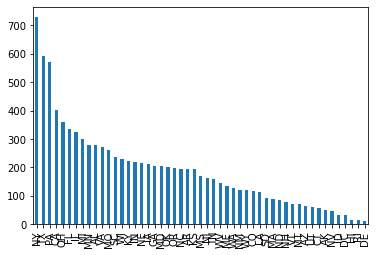

In [53]:
#Create viz for fraud transactions by state:
cc_data_fraud['state'].value_counts().plot(kind='bar')

# Drop unnecessary columns

In [54]:
# Drop out 'street', 'city', 'zip' columns
cc_data.drop(['job','street', 'city', 'zip', 'unix_time'], axis=1, inplace=True)

# Save cleaned dataframe

In [55]:
#save the data to a new csv file
cc_data.to_csv('../cleaned_data/cc_data_cleaned.csv')